In [19]:
# Importing packages
import numpy as np
import math
import matplotlib_inline
import matplotlib.pyplot as plt
import sympy 
from sympy.abc import t
from sympy import Derivative
import latexify
from IPython.display import HTML
from matplotlib.animation import FuncAnimation, FFMpegWriter
import matplotlib.gridspec as gridspec


In [20]:
# Creating sympy variables
u_o = sympy.Symbol('u_o')
u_dot_o = sympy.Symbol('u_dot_o')
w_n = sympy.Symbol('w_n')
t = sympy.Symbol('t')


In [21]:
k=100
m = 20
tFinal = 20 # sec
delT = 0.01                                                #(s) Time-step
w_n = math.sqrt(k/m)
time = np.arange(0, tFinal+delT, delT)
u_t = u_o*sympy.cos(w_n*t) + ((u_dot_o)/w_n)*sympy.sin(w_n*t)

In [22]:
@latexify.function
def displacementFunc(u_o,w_n,u_dot_o,t):
    u_t = u_o*math.cos(w_n*t) + ((u_dot_o)/w_n)*math.sin(w_n*t)
    return u_t

displacementFunc

In [23]:

def computeDisplacement(u_o,u_dot_o):
    displacement = []
    for t in time:
        u_t = u_o*math.cos(w_n*t) + ((u_dot_o)/w_n)*math.sin(w_n*t)
        
        displacement.append(u_t)
    return displacement

In [24]:
derivative = Derivative(u_t,t, evaluate = True) # velocity

@latexify.function
def showVelocityFunc(u_dot_o,u_o,t):
    velocityFunc = 1.0*u_dot_o*math.cos(2.23606797749979*t) - 2.23606797749979*u_o*math.sin(2.23606797749979*t)
    return velocityFunc

showVelocityFunc


In [25]:
def computeVelocity(u_o,u_dot_o):
    velocity = []
    
    for t in time:
        v = 1.0*u_dot_o*math.cos(2.23606797749979*t) - 2.23606797749979*u_o*math.sin(2.23606797749979*t)
        velocity.append(v)
    return velocity


In [26]:
# Declaring acceleration function
secondDerivative = Derivative(derivative, t, evaluate = True )
print(secondDerivative)

def computeAcceleration(u_o,u_dot_o):
    accelerationValues = []

    for t in time:
        acceleration = -2.23606797749979*u_dot_o*math.sin(2.23606797749979*t) - 5.0*u_o*math.cos(2.23606797749979*t)
        accelerationValues.append(acceleration)
    return accelerationValues



-2.23606797749979*u_dot_o*sin(2.23606797749979*t) - 5.0*u_o*cos(2.23606797749979*t)


In [27]:
displacement = computeDisplacement(1,2)
velocity = computeVelocity(1,2)
acceleration = computeAcceleration(1,2)

#Initialize a figure to plot onto

displacementTimeFig, axes = plt.subplots()
function, = axes.plot(time,displacement,label='u(t)',linewidth = 2,color='green',linestyle ='-')
def f(t):
    function.set_ydata(displacement)
    return function,

ani = FuncAnimation(displacementTimeFig,f,frames=50,interval = 500)
HTML(ani.to_jshtml())



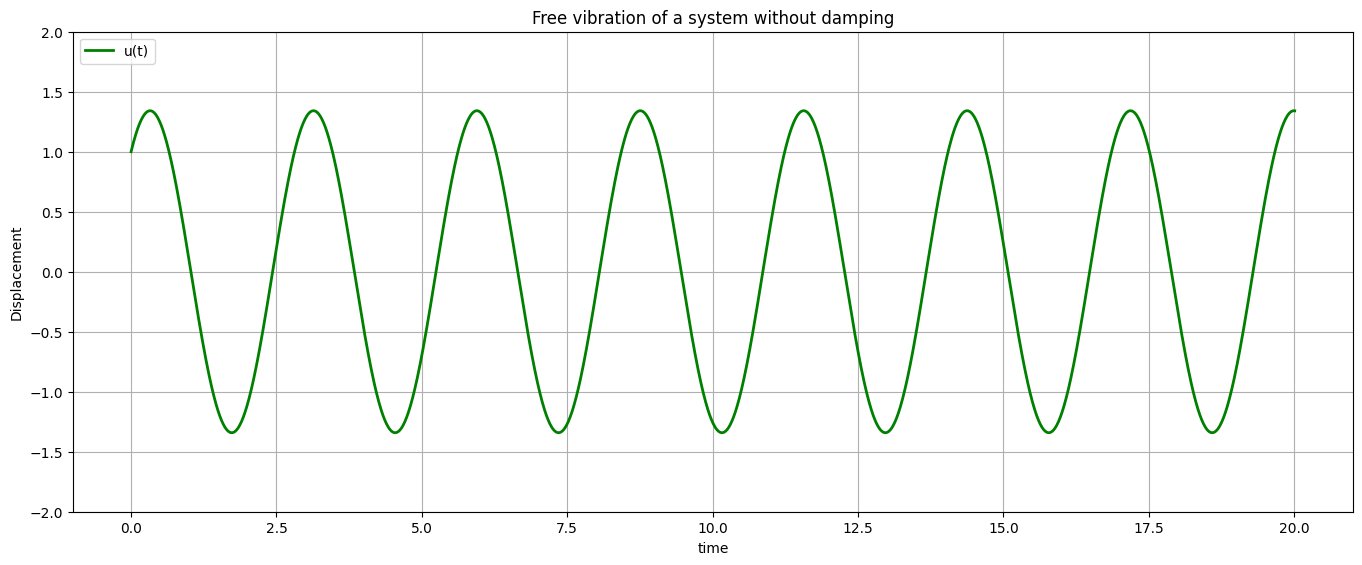

In [28]:
displacementTimeFig = plt.figure()
axes = displacementTimeFig.add_axes([0.1,0.1,2,1])
axes.set_xlabel('time')
axes.set_ylabel('Displacement')
axes.set_ylim([-2,2])
axes.plot(time,displacement,label='u(t)',linewidth = 2,color='green',linestyle ='-')
axes.set_title('Free vibration of a system without damping')
axes.legend(loc='upper left')
plt.grid()
plt.show()

C:\Users\Winslow\AppData\Local\Temp\ipykernel_19972\597716375.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  axes = plt.subplot(gs[0])
MovieWriter ffmpeg unavailable; using Pillow instead.


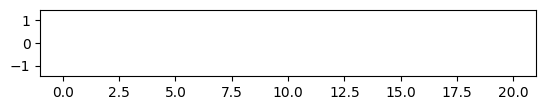

In [30]:
animLength = 100 #(sec)
frameRate = 12 #(5,10,20) frames per second (too high and animation slows down)
plotInterval = 1/frameRate #(sec) time between frame plots
dataInterval = int(plotInterval/delT) #Plot moving elements every 'dataInterval-th' point

gs = gridspec.GridSpec(2,1,height_ratios=[1,1]) #Control subplot layout

fig,axes = plt.subplots()
axes = plt.subplot(gs[0])
axes.set_aspect('equal', adjustable='box') #Set equal scale for axes top subplot

#Set axis limits
function, = axes.plot(time,displacement,label='u(t)',linewidth = 2,color='green',linestyle ='-')
def animate(i):
    function.set_data(time[:i+1],displacement[:i+1])
ani = FuncAnimation(fig,animate,frames= len(time))
ffmeg_writer = FFMpegWriter(fps = 15)
ani.save('displacementTime.gif')

<function matplotlib.pyplot.show(close=None, block=None)>

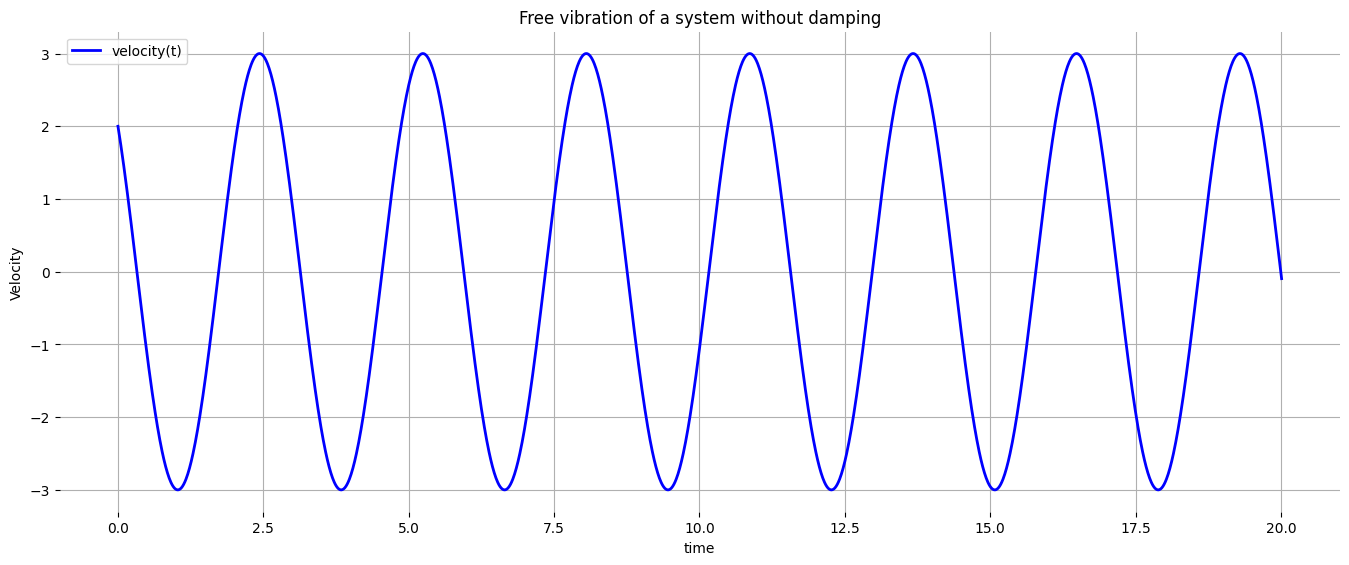

In [16]:
velocityTimeFig = plt.figure()

# House keeping
axes = velocityTimeFig.add_axes([0.1,0.1,2,1],frameon=False)
axes.set_xlabel('time')
axes.set_ylabel('Velocity')

#velocityTimeFig.delaxes(axes)
#velocityTimeFig.add_axes(axes)
#axes.set_ylim([-2,2])

axes.plot(time,velocity,label='velocity(t)',linewidth = 2,color='blue',linestyle ='-')
axes.set_title('Free vibration of a system without damping')
axes.legend(loc='upper left')
plt.grid()
plt.show



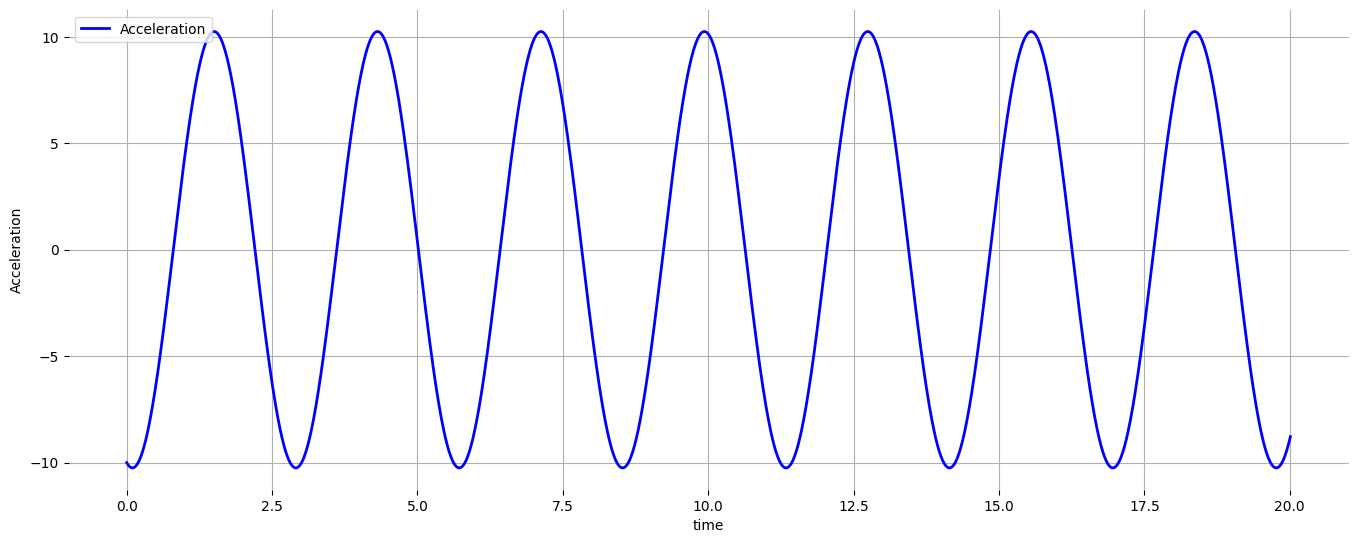

In [127]:
# Plotting acceleration

accelerationTimeFig = plt.figure()

#Housekeeping
axes = accelerationTimeFig.add_axes([0.1,0.1,2,1],frameon=False)
axes.set_xlabel('time')
axes.set_ylabel('Acceleration')

axes.plot(time,acceleration,label='Acceleration',linewidth = 2,color='blue',linestyle ='-')
axes.legend(loc='upper left')
plt.grid()


